In [1]:
sample_space = {'Heads', 'Tails'}

probability_heads = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}')

def is_heads_or_tails(outcome):  return outcome in {'Heads', 'Tails'}
def is_neither(outcome): return not is_heads_or_tails(outcome)

def is_heads(outcome): return outcome == 'Heads'
def is_tails(outcome): return outcome == 'Tails'

def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space
if event_condition(outcome)])

event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]

for event_condition in event_conditions:
    print(f"Event Condition: {event_condition.__name__}")
    event = get_matching_event(event_condition, sample_space)
    print(f'Event: {event}\n')

def compute_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    return len(event) / len(generic_sample_space)

for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}") # p. 7 up


Probability of choosing heads is 0.5
Event Condition: is_heads_or_tails
Event: {'Tails', 'Heads'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.5
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_neither' is 0.0


Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0
Probability of 2 boys is 0.375
[1, 2, 3, 4, 5, 6]
6 rolls sum to 21 with a probability of 0.09284979423868313
There are 4332 ways for 6 die rolls to sum to 21
6 rolls sum to 21 with a probability of 0.09284979423868313
Number of Elements in Unweighted Sample Space:
46656
Number of Elements in Weighted Sample Space:
31
Probability of interval is 0.5446244855967078
Probability of observing more than 7 heads is 0.0546875
Probability of observing more than 7 heads or 7 tails is 0.109375
Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


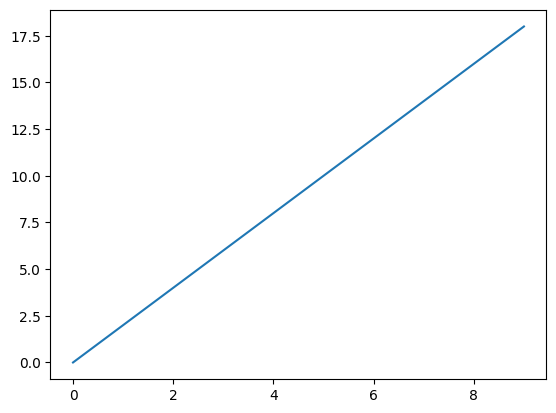

In [2]:
weighted_sample_space = {'Heads': 4, 'Tails': 1}

sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5

event = get_matching_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size / sum(generic_sample_space.values()) # listing 1.11

for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

# 1.2 computing non-trivial probabilities

# 1.2.1 problem 1: analyzing a family with four children

possible_children = ['Boy', 'Girl']
sample_space = set()
for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, child2, child3, child4)
                sample_space.add(outcome) # listing 1.13 on page 9

from itertools import product
all_combinations = product(*(4 * [possible_children]))
assert set(all_combinations) == sample_space # listing 1.14

sample_space_efficient = set(product(possible_children, repeat=4))
assert sample_space == sample_space_efficient # listing 1.15

def has_two_boys(outcome):
    return len([child for child in outcome if child == 'Boy']) == 2

prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys is {prob}") # listing 1.16

# 1.2.2 problem 2: analyzing multiple die rolls

possible_rolls = list(range(1, 7))
print(possible_rolls)

sample_space = set(product(possible_rolls, repeat=6))

def has_sum_of_21(outcome):
    return sum(outcome) == 21

prob = compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}") # listing 1.19

prob = compute_event_probability(lambda x: sum(x) == 21, sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)

# 1.2.3 problem 3: computing ... using weighted sample spaces

from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    total = sum(outcome)
    weighted_sample_space[total] += 1
# listing 1.21

assert weighted_sample_space[6] == 1
assert weighted_sample_space[36] == 1
num_combinations = weighted_sample_space[21]
print(f"There are {num_combinations } ways for 6 die rolls to sum to 21") # listing 1.23

assert sum([4, 4, 4, 4, 3, 2]) == 21 # listing 1.24
assert sum([4, 4, 4, 5, 3, 1]) == 21

event = get_matching_event(lambda x: sum(x) == 21, sample_space)
assert weighted_sample_space[21] == len(event)
assert sum(weighted_sample_space.values()) == len(sample_space) # listing 1.25

prob = compute_event_probability(lambda x: x == 21, weighted_sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}")
# listing 1.26

print('Number of Elements in Unweighted Sample Space:')
print(len(sample_space))
print('Number of Elements in Weighted Sample Space:')
print(len(weighted_sample_space)) # listing 1.27

# 1 ... 3 ... 8 ... 13 ... 17 ... 22 ... 33 ... 38 ... 51 ... 54 ... 58 ... 69

# 1.3

def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum
# listing 1.28

prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21), weighted_sample_space)
print(f"Probability of interval is {prob}") # listing 1.29

def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'], repeat=num_flips):
        heads_count = len([outcome for outcome in coin_flips if outcome == 'Heads'])
        weighted_sample_space[heads_count] += 1
    return weighted_sample_space
weighted_sample_space = generate_coin_sample_space()
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10 # listing 1.30

prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10), weighted_sample_space)
print(f"Probability of observing more than 7 heads is {prob}")
# listing 1.31

prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7), weighted_sample_space)
print(f"Probability of observing more than 7 heads or 7 tails is {prob}")
# listing 1.32

weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15),
weighted_sample_space_20_flips)
print(f"Probability of observing more than 15 heads or 15 tails is {prob}") # listing 1.33

# now on page 18

import matplotlib.pyplot as plt

x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show() # listing 2.2


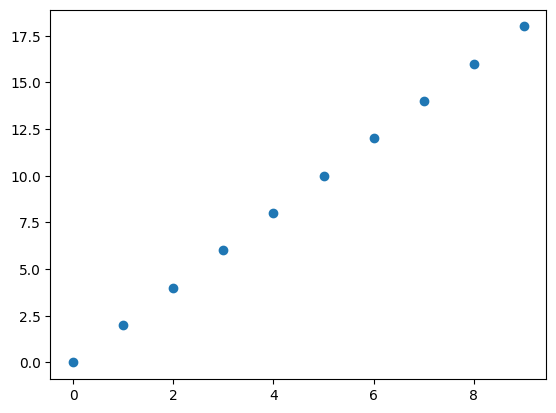

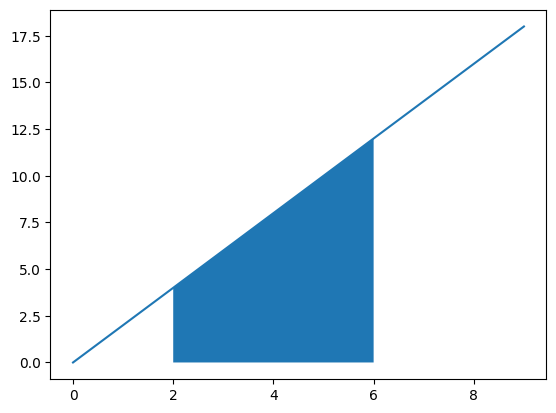

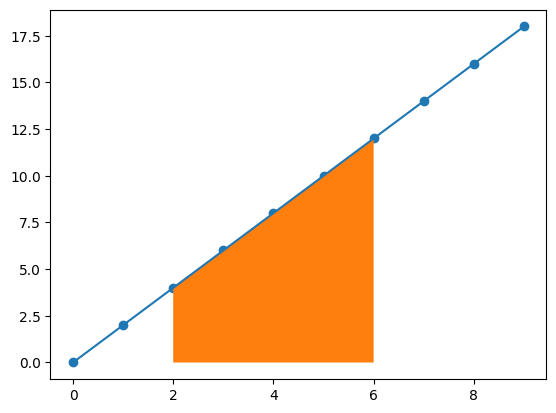

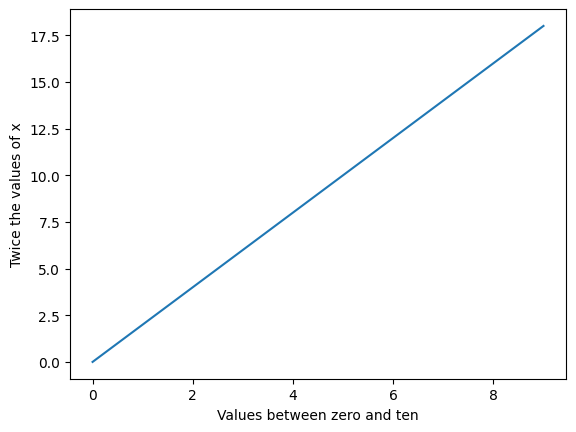

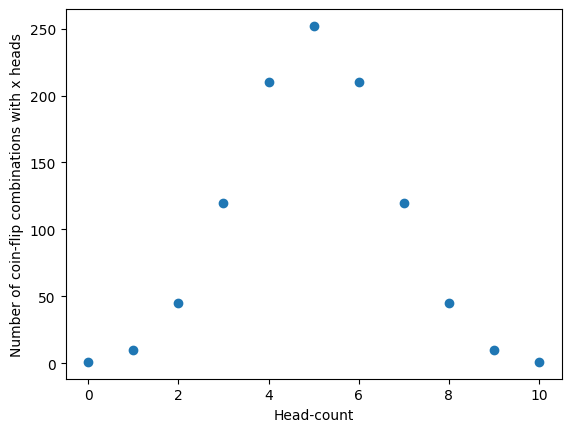

In [3]:
plt.scatter(x, y)
plt.show()
# listing 2.3

plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()
# listing 2.4

plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show() # listing 2.5

plt.plot(x, y)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show() # listing 2.6

x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show() # listing 2.7 on page 22